In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
%matplotlib inline
import os
import collections
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from IPython.display import display, HTML

In [2]:
import os
#os.chdir(r'C:\Users\фора\Desktop\irdm\assignment4-5')


In [3]:
#test=pd.read_csv('test_set.csv',delimiter=';')
train=pd.read_csv('train_set.csv',delimiter=';')
types=pd.read_csv('types.csv',delimiter=';')
codes=pd.read_csv('codes.csv',delimiter=';')
transactions=pd.read_csv('transactions.csv',delimiter=';')


# Explanatory data analysis.
Exploring the features, visualizations etc.

In [6]:
date_time = pd.DataFrame(transactions["datetime"].str.split(' ', expand=True).values,
             columns=['Date', 'Time'])
transactions['date'] =  date_time['Date']
transactions['time'] =  date_time['Time']
transactions['date']=transactions['date'].astype('int64')
# splitting datetime column into days and time columns

In [7]:
ids = transactions['client_id'].unique()
codess = codes['code'].unique()
typess = types['type'].unique()
date = transactions['date'].unique()
# counting the amount of unigue values of client_id, code, type and date

In [8]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    value = len(ids),
    title = {'text': "Unique ids",'font': {'color': 'black','size':20}},
    number={'font':{'color': 'black','size':50}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    value = len(codess),
    title = {'text': "Unique codes",'font': {'color': 'red','size':20}},
    number={'font':{'color': 'red','size':50}},
    domain = {'row': 0, 'column': 1}
))
fig.add_trace(go.Indicator(
    value = len(typess),
    title = {'text': "Unique types",'font': {'color': 'brown','size':20}},
    number={'font':{'color': 'brown','size':50}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    value = len(date),
    title = {'text': "Unique days",'font': {'color': 'blue','size':20}},
    number={'font':{'color': 'blue','size':50}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 4})
fig.show()

In [9]:
transactions=pd.merge(transactions,train)

In [10]:
transactions

,client_id,datetime,code,type,sum,date,time,target
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,0
1,96372458,270 06:16:18,6011,7010,224591.58,270,06:16:18,0
2,96372458,97 10:48:35,4829,2370,-11229.58,97,10:48:35,0
3,96372458,445 07:33:38,4829,2330,-417695.42,445,07:33:38,0
4,96372458,4 09:33:46,4814,1030,-2245.92,4,09:33:46,0
...,...,...,...,...,...,...,...,...
91821,82133712,424 13:23:10,6011,2010,-17967.33,424,13:23:10,1
91822,82133712,232 09:38:10,6536,6110,179673.26,232,09:38:10,1
91823,12289409,108 11:13:33,6011,2010,-132509.03,108,11:13:33,0
91824,71829751,72 14:50:37,6011,2010,-44918.32,72,14:50:37,0


In [11]:
dist_by_gender=  transactions.groupby('target')['client_id'].count().reset_index().sort_values("target",ascending=False)
dist_by_gender = dist_by_gender.reset_index()
dist_by_gender.drop("index",axis = 1,inplace=True)

#data preparation 
dist_by_gender

,target,client_id
0,1,45111
1,0,46715


In [12]:
fig = go.Figure([go.Pie(values=dist_by_gender['client_id'],
                        hole=0.3)])  

fig.update_traces( textinfo='percent', textfont_size=15)
fig.update_layout(title="Distribution of transactions by genders",title_x=0.5)
fig.show()

In [13]:
transactions.dtypes

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
date           int64
time          object
target         int64
dtype: object

As we can see from the above information, client_id, code, type, date, target are int64 types, while datetime and time is object type, and last sum is float type.

In [14]:
dist_by_type=transactions.groupby('type')['client_id'].count().sort_values(ascending=False).head().reset_index()
# distribution by type -> we want to see which type was used most in our transaction dataset.

In [15]:
fig = go.Figure([go.Pie(labels=dist_by_type['type'], 
                        values=dist_by_type['client_id'],
                        hole=0.3)])  

fig.update_traces( textinfo='percent', textfont_size=15)
fig.update_layout(title="Distribution of users by type of transaction",title_x=0.5)
fig.show()

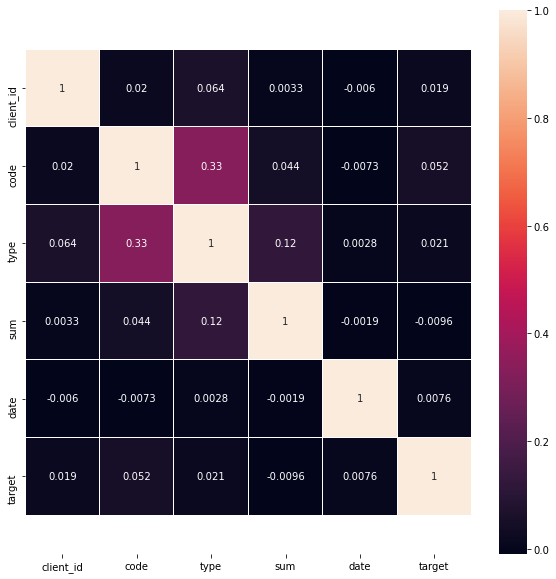

In [16]:
corrmat = transactions.corr()
corr_features = corrmat.index

plt.figure(figsize=(10,10))
#Plotting heat map
g=sns.heatmap(transactions[corr_features].corr(),annot=True,linewidths=.1)
b, t = plt.ylim() # Finding the values for bottom and top
b += 0.5
t -= 0.5
plt.ylim(b, t) 
plt.show() 
# showing correlation 

From this, we can see that type and code have high corelation

In [16]:
total_code= transactions.groupby('code')['client_id'].count().sort_values(ascending=False).head(10).reset_index()
figsize = [10, 7]
x = total_code['code'].astype(str)
y = total_code['client_id']
width = 0.8
color = 'purple'
total_code
# showing top 10 codes by frequency

,code,client_id
0,6011,19538
1,6010,14093
2,4814,13044
3,5411,13003
4,4829,8134
5,5499,4456
6,5912,1862
7,5541,1831
8,5331,1687
9,5812,1448


In [17]:
import matplotlib.pyplot as plt
import plotly.express as px
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(x,y)
# plt.show()
fig = px.bar(total_code, x=x, y=y,color='client_id')
fig.update_layout(title="Top 10 code users",title_x=0.5)
fig.show()

From this bar chart, we can conclude that codes by numbers 6011, 6010, 4814, 5411 and etc. have been used very often in transaction dataset

In [18]:
total_codes = list(transactions['code'])
counter=collections.Counter(total_codes)
popular_codes = pd.DataFrame.from_dict(counter, orient='index').reset_index()
popular_codes = popular_codes.rename(columns={'index':'Code', 0:'Count'})
popular_codes.sort_values(by = 'Count', ascending = False).head()

,Code,Count
0,6011,19538
3,6010,14093
2,4814,13044
5,5411,13003
1,4829,8134


In [19]:
top_codes = popular_codes.head(5)
top_codes.sort_values(by='Count', ascending=False, inplace = True)
tops = ['Финансовые институты — снятие наличности автоматически',
'Финансовые институты — снятие наличности вручную',
'Звонки с использованием телефонов, считывающих магнитную ленту',
'Бакалейные магазины, супермаркеты',
'Денежные переводы']
top_codes['code_description'] = tops

In [20]:
fig = px.bar(top_codes, x=top_codes['code_description'], y = top_codes['Count'])
fig.update_layout(title="Top 5 commonly code description",title_x=0.5)
fig.show()

From this graph, we can see that codes like "Cash withdrawal", "Cash withdrawal manulally", "Calling with moblie phone", "Supermarkets", "Cash transfers" were the most ones.

In [23]:
conditions = [
    (transactions['date'] >= 0) & (transactions['date'] <= 30),
    (transactions['date'] >= 30) & (transactions['date'] <= 60),
    (transactions['date'] >= 60) & (transactions['date'] <= 91),
    (transactions['date'] >= 91) & (transactions['date'] <= 121),
    (transactions['date'] >= 121) & (transactions['date'] <= 152),
    (transactions['date'] >= 153) & (transactions['date'] < 184),
    (transactions['date'] >= 184) & (transactions['date'] < 214),
    (transactions['date'] >= 214) & (transactions['date'] <= 245),
    (transactions['date'] >= 245) & (transactions['date'] <= 275),
    (transactions['date'] >= 275) & (transactions['date'] <= 306),
    (transactions['date'] >= 306) & (transactions['date'] <= 336),
    (transactions['date'] >= 336) & (transactions['date'] <= 367),
    (transactions['date'] >= 367) & (transactions['date'] <= 398),
    (transactions['date'] >= 398) & (transactions['date'] <= 428),
    (transactions['date'] >= 428) & (transactions['date'] <= 459),
    ]

values = ['August-2014', 'September-2014', 'October-2014', 'November-2014', 
'December-2014', 'January-2015', 'February-2015', 'March-2015', 'April-2015', 
'May-2015', 'June-2015', 'July-2015', 'August-2015', 'Septebmer-2015', 'October-2015']

transactions['month'] = np.select(conditions, values)

Text(0, 0.5, 'Количество')

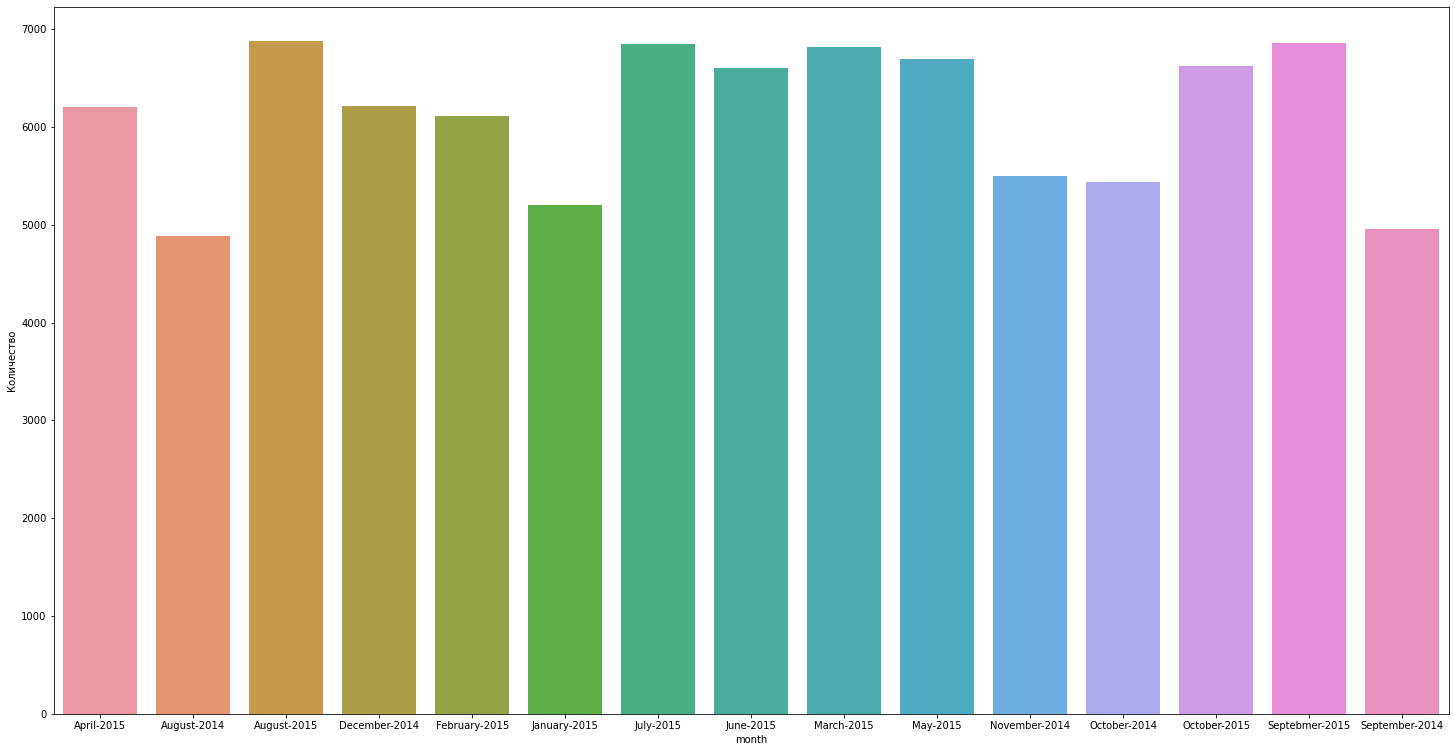

In [24]:
by_month = transactions.groupby('month').count().reset_index()
plt.figure(figsize=(25,13)) 
sns.barplot(x = by_month['month'], y = by_month['client_id']) 
plt.ylabel("Количество")

Text(0, 0.5, 'Количество')

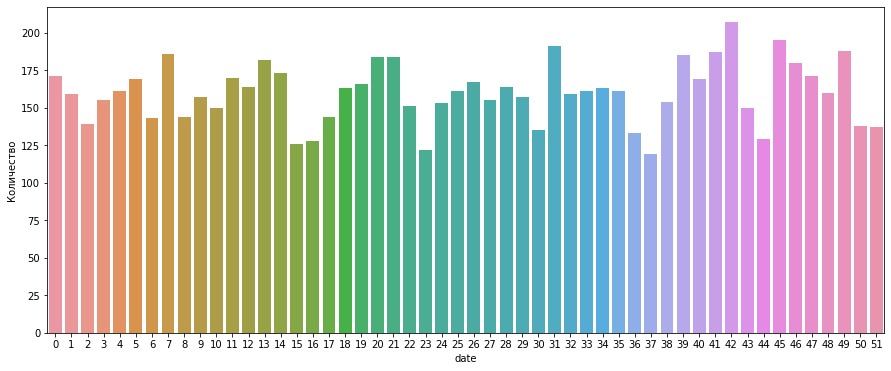

In [25]:
d= transactions.groupby('date').count().reset_index()
d1 = d[(d['date']<=51)]
d2 = d[(d['date']>51)&(d['date']<=102)]
d3 = d[(d['date']>102)&(d['date']<=153)]
d4 = d[(d['date']>153)&(d['date']<=204)]
d5 = d[(d['date']>204)&(d['date']<=255)]
d6 = d[(d['date']>255)&(d['date']<=306)]
d7 = d[(d['date']>306)&(d['date']<=357)]
d8 = d[(d['date']>357)&(d['date']<=408)]
d9 = d[(d['date']>408)]
plt.figure(figsize=(15,6)) 
 
sns.barplot(x=d1['date'], y= d1['client_id']) 
plt.ylabel("Количество")

# FEATURE ENGINEERING. 
### Encodings, generating the features from datetime, sum, code, type.

In [34]:
#test=pd.read_csv('test_set.csv',delimiter=';')
train_set=pd.read_csv('train_set.csv',delimiter=';')
types=pd.read_csv('types.csv',delimiter=';')
codes=pd.read_csv('codes.csv',delimiter=';')
transactions=pd.read_csv('transactions.csv',delimiter=';')

In [27]:
# working with datetime and sum columns
date_time = pd.DataFrame(transactions["datetime"].str.split(' ', expand=True).values,
             columns=['Date', 'Time'])
transactions['date'] = date_time['Date']
transactions['date'] = transactions['date'].astype('int64')
transactions['time'] = date_time['Time']

transactions['plus_sum'] = transactions['sum']
transactions['minus_sum'] = transactions['sum']

transactions['plus_sum'] = transactions[transactions['sum']>=0]['sum']
transactions['minus_sum'] = transactions[transactions['sum']<0]['sum']

transactions['plus_sum'] = transactions['plus_sum'].fillna(0)
transactions['minus_sum'] = transactions['minus_sum'].fillna(0)
transactions.head()


,client_id,datetime,code,type,sum,date,time,plus_sum,minus_sum
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,0.00,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47,377,17:20:40,67377.47,0.00
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,0.00,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66,263,12:57:08,0.00,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,0.00,-3368.87


    Here we worked out with the column datetime splitted it by day number and time (in further feature egineering we will work with this column) and created new columns date and time. Also, we splitted sum column by plus_sum(amount of income) and minus_sum(amount of outcome).

In [28]:
# working with codes -> creating new columns
transactions['income'] = (transactions['sum']>=0).astype(int)
transactions['outcome'] = (transactions['sum']<0).astype(int)
transactions['agriculture'] = (transactions['code']<=1499).astype(int)
transactions['contracts'] = ((transactions['code']>=1500) & (transactions['code']<=2999)).astype(int)
transactions['avia_services'] = ((transactions['code']>=3000) & (transactions['code']<=3299)).astype(int)
transactions['car_rent'] = ((transactions['code']>=3300) & (transactions['code']<=3499)).astype(int)
transactions['house_rent'] = ((transactions['code']>=3500) & (transactions['code']<=3999)).astype(int)
transactions['transports'] = ((transactions['code']>=4000) & (transactions['code']<=4799)).astype(int)
transactions['pub_utilities'] = ((transactions['code']>=4800) & (transactions['code']<=4999)).astype(int)
transactions['trade'] = ((transactions['code']>=5000) & (transactions['code']<=5599)).astype(int)
transactions['clothes_shops'] = ((transactions['code']>=5600) & (transactions['code']<=5699)).astype(int)
transactions['other_shops'] = ((transactions['code']>=5700) & (transactions['code']<=7299)).astype(int)
transactions['business_services'] = ((transactions['code']>=7300) & (transactions['code']<=7999)).astype(int)
transactions['prof_services'] = ((transactions['code']>=8000) & (transactions['code']<=8999)).astype(int)
transactions['gov_services'] = ((transactions['code']>=9000) & (transactions['code']<=9999)).astype(int)
transactions.head()

,client_id,datetime,code,type,sum,date,time,plus_sum,minus_sum,income,...,car_rent,house_rent,transports,pub_utilities,trade,clothes_shops,other_shops,business_services,prof_services,gov_services
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,0.00,-561478.94,0,...,0,0,0,0,0,0,1,0,0,0
1,24567813,377 17:20:40,6011,7010,67377.47,377,17:20:40,67377.47,0.00,1,...,0,0,0,0,0,0,1,0,0,0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,0.00,-44918.32,0,...,0,0,0,0,0,0,1,0,0,0
3,14331004,263 12:57:08,6011,2010,-3368873.66,263,12:57:08,0.00,-3368873.66,0,...,0,0,0,0,0,0,1,0,0,0
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,0.00,-3368.87,0,...,0,0,0,1,0,0,0,0,0,0


    income -> if sum is positive count as 1, otherwise 0 - for counting count of incomes

    outcome -> if sum is negative count as 1, otherwise 0 - for counting count of outcomes

##### codes
###### 0001-1499 -> agriculture,
###### 1500-2999 -> contracts,
###### 3000-3299 -> avia_services,
###### 3300-3499 -> car_rent,
###### 3500-3999 -> house_rent,
###### 4000-4799 -> transports,
###### 4800-4999 -> pub_utilities,
###### 5000-5599 -> trade,
###### 5600-5699 -> clothes_shops,
###### 5700-7299 -> other_shops,
###### 7300-7999 -> business_services,
###### 8000-8999 -> prof_services,
###### 9000-9999 -> gov_services.

These are unique codes in the bank world, so we did check and all of them fitted with the conditions.
And we created new 13 columns/features from codes column, new 2 columns from sum column

In [29]:
# working with types
# income
transactions['atm_contr'] = ((transactions['type'].astype(str).str.contains
('7010|7011|7014|7015|7020|7021|7024|7025|7060', regex = True)) & 
(transactions['sum']>0)).astype(int)
transactions['refill_acc'] = ((transactions['type'].astype(str).str.contains
('7050|7081|7082|7084', regex = True)) & (transactions['sum']>0)).astype(int)
transactions['refill_card'] = ((transactions['type'].astype(str).str.contains
('7030|7031|7034|7035|7040|7041|7044|7045|7070|7071|7074|7075', regex = True)) & 
(transactions['sum']>0)).astype(int)

# outcome
transactions['cash_withdr'] = ((transactions['type'].astype(str).str.contains
('2000|2001|2010|2011|2020|2021|2100|2110|2200|2210|2900', regex = True)) & 
(transactions['sum']<0)).astype(int)
transactions['transfer_acc'] = ((transactions['type'].astype(str).str.contains
('2401|2402|2412|2422|2432', regex = True)) & (transactions['sum']<0)).astype(int)
transactions['transfer_card'] = ((transactions['type'].astype(str).str.contains
('2330|2331|2340|2341|2370|2371|2440|2446|2456|2460', regex = True)) &
 (transactions['sum']<0)).astype(int)
transactions['transfer_leg_ent'] = ((transactions['type'].astype(str).str.contains
('2320|2323|2325', regex = True)) & (transactions['sum']<0) & 
(transactions['code']!=4900)).astype(int)
transactions['purchase'] = ((transactions['type'].astype(str).str.contains
('1000|1010|1030|1100|1110|1200|1210|1310|1410|1510|2901|2992|8035|8100|8145|2992|8035|8100|8146', 
regex = True)) & (transactions['sum']<0) & (transactions['code']!=4900)).astype(int)
transactions.head()

,client_id,datetime,code,type,sum,date,time,plus_sum,minus_sum,income,...,prof_services,gov_services,atm_contr,refill_acc,refill_card,cash_withdr,transfer_acc,transfer_card,transfer_leg_ent,purchase
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,0.00,-561478.94,0,...,0,0,0,0,0,1,0,0,0,0
1,24567813,377 17:20:40,6011,7010,67377.47,377,17:20:40,67377.47,0.00,1,...,0,0,1,0,0,0,0,0,0,0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,0.00,-44918.32,0,...,0,0,0,0,0,1,0,0,0,0
3,14331004,263 12:57:08,6011,2010,-3368873.66,263,12:57:08,0.00,-3368873.66,0,...,0,0,0,0,0,1,0,0,0,0
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,0.00,-3368.87,0,...,0,0,0,0,0,0,0,0,0,1


##### types
###### salary_contr -> sum > 0 and type in (7000)
###### atm_contr -> sum > 0 and type in (7010, 7011, 7014, 7015, 7020, 7021, 7024, 7025, 7060)
###### refill_acc -> sum > 0 and type in (7050, 7081, 7082, 7084)
###### refll_card -> sum > 0 and type in (7030, 7031, 7034, 7035, 7040, 7041, 7044, 7045, 7070, 7071, 7074, 7075)

###### cash_withdr -> sum < 0 and type in (2000, 2001, 2010, 2011, 2020, 2021, 2100, 2110, 2200, 2210, 2900)
###### transfer_acc -> sum < 0 and type in (2401, 2402, 2412, 2422, 2432)
###### transfer_card -> sum < 0 and type in (2330, 2331, 2340, 2341, 2370, 2371, 2440, 2446, 2456, 2460)
###### transfer_leg_ent -> sum < 0 and type in (2320, 2323, 2325) and not (mcc_code eq 4900)
###### purchase -> sum < 0 and (type in (1000, 1010, 1030, 1100, 1110, 1200, 1210, 1310, 1410, 1510, 2901, 2992, 8035, 8100, 8145, 2992, 8035, 8100, 8146) or code == 4900) and code != -1

    So, from types column we created new 9 features dividing by type of transactions.

In [30]:
# working with day -> creating new columns for month
transactions['Aug-2014'] = (transactions['date']<=30).astype(int)
transactions['Sep-2014'] = ((transactions['date']>30) & (transactions['date']<=60)).astype(int)
transactions['Oct-2014'] = ((transactions['date']>30) & (transactions['date']<=60)).astype(int)
transactions['Nov-2014'] = ((transactions['date']>60) & (transactions['date']<=91)).astype(int)
transactions['Dec-2014'] = ((transactions['date']>91) & (transactions['date']<=121)).astype(int)
transactions['Jan-2015'] = ((transactions['date']>121) & (transactions['date']<=152)).astype(int)
transactions['Feb-2015'] = ((transactions['date']>152) & (transactions['date']<=184)).astype(int)
transactions['Mar-2015'] = ((transactions['date']>184) & (transactions['date']<=214)).astype(int)
transactions['Apr-2015'] = ((transactions['date']>214) & (transactions['date']<=245)).astype(int)
transactions['May-2015'] = ((transactions['date']>245) & (transactions['date']<=275)).astype(int)
transactions['June-2015'] = ((transactions['date']>275) & (transactions['date']<=306)).astype(int)
transactions['July-2015'] = ((transactions['date']>306) & (transactions['date']<=367)).astype(int)
transactions['Aug-2015'] = ((transactions['date']>367) & (transactions['date']<=398)).astype(int)
transactions['Sep-2015'] = ((transactions['date']>398) & (transactions['date']<=428)).astype(int)
transactions['Oct-2015'] = ((transactions['date']>428) & (transactions['date']<=459)).astype(int)
transactions.head()


,client_id,datetime,code,type,sum,date,time,plus_sum,minus_sum,income,...,Jan-2015,Feb-2015,Mar-2015,Apr-2015,May-2015,June-2015,July-2015,Aug-2015,Sep-2015,Oct-2015
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,0.00,-561478.94,0,...,0,0,0,0,0,0,0,0,1,0
1,24567813,377 17:20:40,6011,7010,67377.47,377,17:20:40,67377.47,0.00,1,...,0,0,0,0,0,0,0,1,0,0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,0.00,-44918.32,0,...,0,0,0,0,0,0,0,0,0,0
3,14331004,263 12:57:08,6011,2010,-3368873.66,263,12:57:08,0.00,-3368873.66,0,...,0,0,0,0,1,0,0,0,0,0
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,0.00,-3368.87,0,...,1,0,0,0,0,0,0,0,0,0


    We made an analysis and find out that the least day when amount of clients made transactions was day number 153. We took it as Januray 2015, becuase we thought that after NY holiday there will be less people who will make transactions. From day column we created new 15 features as monthes starting from august 2014 and till October of 2015. 

In [31]:
# working with parts of day
day_part = pd.DataFrame(transactions["time"].str.split(':', expand=True).values,
             columns=['Hour', 'Min', 'Sec'])
transactions['hour'] = (day_part['Hour']).astype(int)

transactions['early_mor'] = ((transactions['hour']>4) & (transactions['hour']<8)).astype(int)
transactions['morning'] = ((transactions['hour']>=8) & (transactions['hour']<=10)).astype(int)
transactions['late_mor'] = ((transactions['hour']>10) & (transactions['hour']<=11)).astype(int)
transactions['early_aft'] = ((transactions['hour']>12) & (transactions['hour']<=14)).astype(int)
transactions['late_aft'] = ((transactions['hour']>14) & (transactions['hour']<=16)).astype(int)
transactions['early_eve'] = ((transactions['hour']>16) & (transactions['hour']<=18)).astype(int)
transactions['late_eve'] = ((transactions['hour']>18) & (transactions['hour']<=21)).astype(int)
transactions['night'] = ((transactions['hour']>21) & (transactions['hour']<=4)).astype(int)
# transactions.head()

    Here we worked with time column, with its hour part. We divided it to parts of a day, morning: early morning, morning, late morning; afternoon: early afternoon, late afternoon; evening: early evening late evening; and night. 

In [32]:
# dropping unneeded columns
transactions.drop(['datetime', 'code', 'sum', 'date', 'time', 'hour', 'type'], axis=1, inplace=True)
transactions.head()
# Here we drop the columns from which we generated features, 
# we do not need them because they don't give us any useful information

,client_id,plus_sum,minus_sum,income,outcome,agriculture,contracts,avia_services,car_rent,house_rent,...,Sep-2015,Oct-2015,early_mor,morning,late_mor,early_aft,late_aft,early_eve,late_eve,night
0,96372458,0.00,-561478.94,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,24567813,67377.47,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,21717441,0.00,-44918.32,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,14331004,0.00,-3368873.66,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85302434,0.00,-3368.87,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
# grouping by unique id of clients and mergin with train set
transactions = transactions.groupby(by='client_id').sum().reset_index()
transactions = pd.merge(transactions, train_set)
transactions.head()

,client_id,code,type,sum,target
0,22899,51818,34391,50847.54,1
1,27914,21649,16090,74115.21,1
2,28753,71894,22130,-2589800.29,0
3,38084,141335,70520,693495.66,0
4,49793,113841,36530,-1382413.97,1


In [36]:
# we can see all columns
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  6000 non-null   int64  
 1   code       6000 non-null   int64  
 2   type       6000 non-null   int64  
 3   sum        6000 non-null   float64
 4   target     6000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 281.2 KB


    From this we can see that we have now 50 columns and all of them are non-null values.

In [37]:
transactions.head()

,client_id,code,type,sum,target
0,22899,51818,34391,50847.54,1
1,27914,21649,16090,74115.21,1
2,28753,71894,22130,-2589800.29,0
3,38084,141335,70520,693495.66,0
4,49793,113841,36530,-1382413.97,1


           0      1
0  client_id  22899
1       code  51818
2       type  34391
3        sum  50847
4     target      1


<ipython-input-39-214538cc6705>:48: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 

<ipython-input-39-214538cc6705>:49: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 

<ipython-input-39-214538cc6705>:50: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 

<ipython-input-39-214538cc6705>:51: Matp

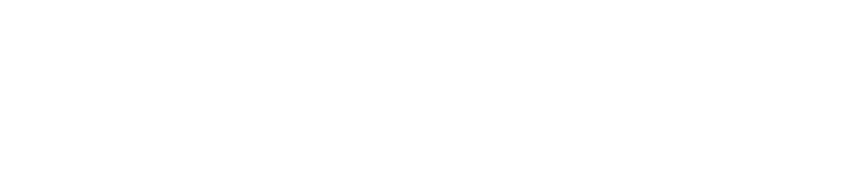

In [39]:
# transactions
def input_s():
    input_s = int(input("Please enter id of client: "))
    len_input = transactions[transactions['client_id']==input_s]
    while len(len_input)==0:
        print("Sorry we don't have client with this id or no info about this client.")
        input_s = int(input("Please re-enter id of client: "))
        len_input = transactions[transactions['client_id']==input_s]
    return input_s

def show_info(inp):
    t = transactions[transactions['client_id']==inp]
    c_names = t.columns.tolist()
    c_value = t.values
    c_values = np.reshape(c_value, (len(c_names), 1))
    res = {c_names[i]: abs(int(c_values[i])) for i in range(len(c_names))}
    res = {x:y for x,y in res.items() if y!=0}
    # print(res)
    d_list = list(res.items())
    df = pd.DataFrame(d_list)

    # if wtoto
    print(df.head())

    df = df.iloc[5:]
    # print(df)
    # print(d_list)
    list_c = ['agriculture', 'contracts', 'pub_utilities', 'other_shops']
    list_t = []
    list_mon = []
    list_day = ['morning', 'early_aft', 'early_eve']

    codes_list_label = []
    codes_list_data = []
    day_list_label = []
    day_list_data = []
    for key in res:
        for i in list_c:
            if key==i:
                codes_list_label.append(key)
                codes_list_data.append(res[key])
        for i in list_day:
            if key==i:
                day_list_label.append(key)
                day_list_data.append(res[key])
                
    fig, axs = plt.subplots(1,4, figsize=(15,20))
    axs[0].pie(codes_list_data, labels=codes_list_label, autopct=lambda x: '{:.0f}'.format(x*sum(codes_list_data)/100))
    axs[1].pie(day_list_data, labels=day_list_label, autopct=lambda x: '{:.0f}'.format(x*sum(day_list_data)/100))
    axs[2].pie(codes_list_data, labels=codes_list_label, autopct=lambda x: '{:.0f}'.format(x*sum(codes_list_data)/100))
    axs[3].pie(day_list_data, labels=day_list_label, autopct=lambda x: '{:.0f}'.format(x*sum(day_list_data)/100))
    plt.show()


input_input = input_s()
show_info(input_input)


In [40]:
top_incomes = transactions.groupby('client_id', as_index = True).agg({'income': 'sum'})
top_outcomes = transactions.groupby('client_id', as_index = True).agg({'outcome': 'sum'})

SpecificationError: Column(s) ['income'] do not exist

NameError: name 'top_incomes' is not defined

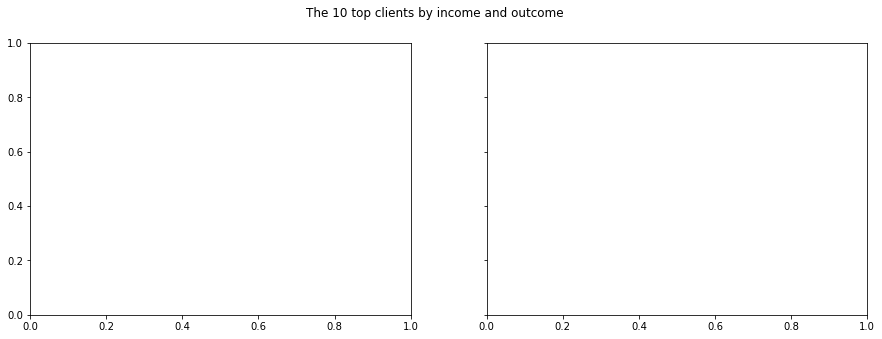

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('The 10 top clients by income and outcome')

sns.barplot(ax=axes[0], x = top_incomes.index, y = top_incomes.values)
axes[0].set_title('Income by client_id')

sns.barplot(ax=axes[1], x= top_outcomes.index, y = top_outcomes.values)
axes[1].set_title('Outcome by client_id')


# UNSUPERVISED LEARNING
Do the Cluster analysis. Segment the customers. K-means,
Hierarchical Clustering. With different metrics, linkages. Visualize the clusters etc.
Look for the optimal number of the clusters

In [42]:
transactions = pd.read_csv('transactions.csv', delimiter=';')
types = pd.read_csv('types.csv', delimiter=';')
codes = pd.read_csv('codes.csv', delimiter=';')
train_set = pd.read_csv('train_set.csv', delimiter=';')
test_set = pd.read_csv('test_set.csv', delimiter=';')

In [43]:
# working with datetime
date_time = pd.DataFrame(transactions["datetime"].str.split(' ', expand=True).values,
             columns=['Date', 'Time'])
transactions['date'] = date_time['Date']
transactions['date'] = transactions['date'].astype('int64')
transactions['time'] = date_time['Time']

transactions['plus_sum'] = transactions['sum']
transactions['minus_sum'] = transactions['sum']

transactions['plus_sum'] = transactions[transactions['sum']>=0]['sum']
transactions['minus_sum'] = transactions[transactions['sum']<0]['sum']

transactions['plus_sum'] = transactions['plus_sum'].fillna(0)
transactions['minus_sum'] = transactions['minus_sum'].fillna(0)
transactions.head()


,client_id,datetime,code,type,sum,date,time,plus_sum,minus_sum
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,0.00,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47,377,17:20:40,67377.47,0.00
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,0.00,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66,263,12:57:08,0.00,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,0.00,-3368.87


In [44]:
# working with codes -> creating new columns
transactions['agriculture'] = (transactions['code']<=1499).astype(int)
transactions['contracts'] = ((transactions['code']>=1500) & (transactions['code']<=2999)).astype(int)
transactions['avia_services'] = ((transactions['code']>=3000) & (transactions['code']<=3299)).astype(int)
transactions['car_rent'] = ((transactions['code']>=3300) & (transactions['code']<=3499)).astype(int)
transactions['house_rent'] = ((transactions['code']>=3500) & (transactions['code']<=3999)).astype(int)
transactions['transports'] = ((transactions['code']>=4000) & (transactions['code']<=4799)).astype(int)
transactions['pub_utilities'] = ((transactions['code']>=4800) & (transactions['code']<=4999)).astype(int)
transactions['trade'] = ((transactions['code']>=5000) & (transactions['code']<=5599)).astype(int)
transactions['clothes_shops'] = ((transactions['code']>=5600) & (transactions['code']<=5699)).astype(int)
transactions['other_shops'] = ((transactions['code']>=5700) & (transactions['code']<=7299)).astype(int)
transactions['business_services'] = ((transactions['code']>=7300) & (transactions['code']<=7999)).astype(int)
transactions['prof_services'] = ((transactions['code']>=8000) & (transactions['code']<=8999)).astype(int)
transactions['gov_services'] = ((transactions['code']>=9000) & (transactions['code']<=9999)).astype(int)
transactions['income'] = (transactions['sum']>=0).astype(int)
transactions['outcome'] = (transactions['sum']<0).astype(int)
transactions.head()

,client_id,datetime,code,type,sum,date,time,plus_sum,minus_sum,agriculture,...,transports,pub_utilities,trade,clothes_shops,other_shops,business_services,prof_services,gov_services,income,outcome
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,0.00,-561478.94,0,...,0,0,0,0,1,0,0,0,0,1
1,24567813,377 17:20:40,6011,7010,67377.47,377,17:20:40,67377.47,0.00,0,...,0,0,0,0,1,0,0,0,1,0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,0.00,-44918.32,0,...,0,0,0,0,1,0,0,0,0,1
3,14331004,263 12:57:08,6011,2010,-3368873.66,263,12:57:08,0.00,-3368873.66,0,...,0,0,0,0,1,0,0,0,0,1
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,0.00,-3368.87,0,...,0,1,0,0,0,0,0,0,0,1


In [45]:
transactions

,client_id,datetime,code,type,sum,date,time,plus_sum,minus_sum,agriculture,...,transports,pub_utilities,trade,clothes_shops,other_shops,business_services,prof_services,gov_services,income,outcome
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,0.00,-561478.94,0,...,0,0,0,0,1,0,0,0,0,1
1,24567813,377 17:20:40,6011,7010,67377.47,377,17:20:40,67377.47,0.00,0,...,0,0,0,0,1,0,0,0,1,0
2,21717441,55 13:38:47,6011,2010,-44918.32,55,13:38:47,0.00,-44918.32,0,...,0,0,0,0,1,0,0,0,0,1
3,14331004,263 12:57:08,6011,2010,-3368873.66,263,12:57:08,0.00,-3368873.66,0,...,0,0,0,0,1,0,0,0,0,1
4,85302434,151 10:34:12,4814,1030,-3368.87,151,10:34:12,0.00,-3368.87,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,147,11:50:53,0.00,-26344.59,0,...,0,0,1,0,0,0,0,0,0,1
130035,28369355,305 11:59:34,4829,2330,-24705.07,305,11:59:34,0.00,-24705.07,0,...,0,1,0,0,0,0,0,0,0,1
130036,40949707,398 21:13:58,5411,1110,-40353.72,398,21:13:58,0.00,-40353.72,0,...,0,0,1,0,0,0,0,0,0,1
130037,7174462,409 13:58:14,5411,1010,-25536.06,409,13:58:14,0.00,-25536.06,0,...,0,0,1,0,0,0,0,0,0,1


In [46]:
rfm=pd.DataFrame()
rfm['client_id']=transactions['client_id']
rfm['Total Price']=transactions['minus_sum']
rfm['Date']=transactions['date']
rfm['time']=transactions['time']
rfm=rfm[rfm['Total Price']<0]
rfm['Date']=rfm['Date']-457
rfm['recency']=rfm['Date'].abs()
rfm['Frequency']= 1
#-- creating the aggregation function
func = {}

func["recency"] = ["min", "max"]
func["Frequency"] = "sum"
func["Total Price"] = "sum"
#--
rfm_final=rfm.groupby('client_id').agg(func)
rfm_final.columns = ["min_recency", "max_recency",'frequency', "Total price"]
rfm_final['Total price']=rfm_final['Total price'].abs()
rfm_final


,min_recency,max_recency,frequency,Total price
client_id,,,,
22899,16,391,6,34497.27
27914,196,290,2,4491.84
28753,24,366,12,3263575.02
31385,143,417,11,121705.95
38084,28,396,20,1058318.65
...,...,...,...,...
99967537,125,125,1,336887.37
99984336,9,9,1,179673.26
99985917,396,396,1,224591.58


In [47]:
quantiles=rfm_final.quantile(q=[0.25,0.5,0.75])
quantiles

,min_recency,max_recency,frequency,Total price
0.25,11.0,339.0,5.0,99150.45
0.50,30.0,412.0,10.0,269479.79
0.75,76.0,442.0,17.0,641806.28


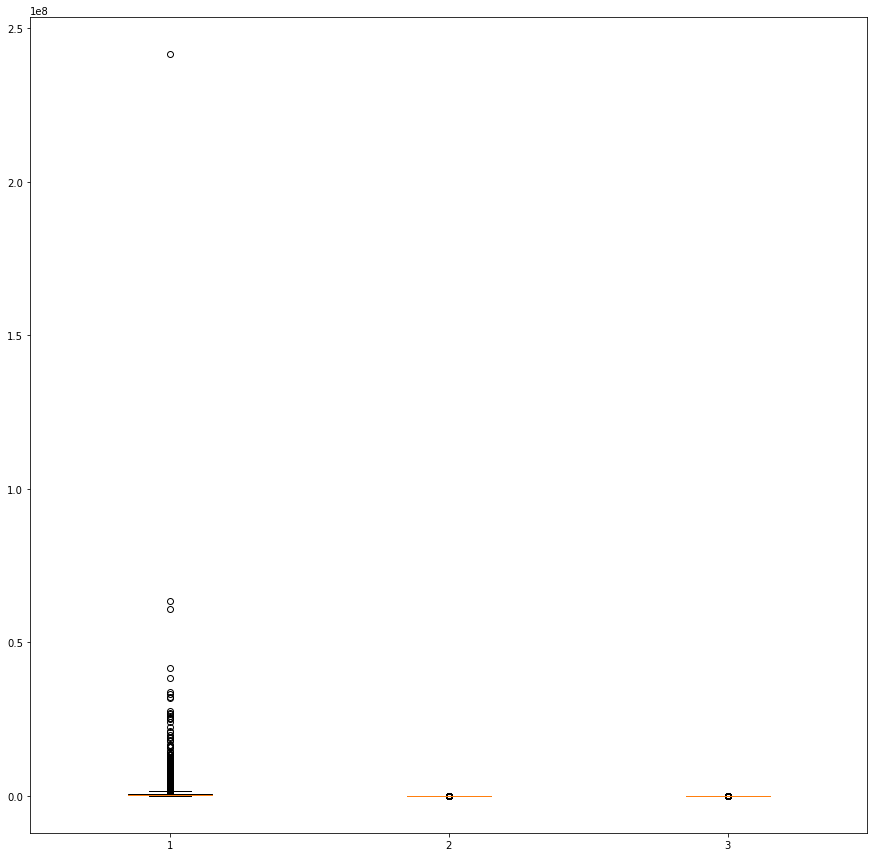

In [48]:
segmented_rfm=rfm_final
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
segmented_rfm['Total price']=segmented_rfm['Total price'].abs()
segmented_rfm['r_quartile'] = segmented_rfm['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Total price'].apply(FMScore, args=('Total price',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm = segmented_rfm.reset_index()

segmented_rfm.sort_values(by='RFMScore')
data=segmented_rfm[['Total price', 'frequency','min_recency']]
fig=plt.figure(figsize=(15,15))
plt.boxplot(data)
plt.show()

In [49]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [50]:
scaler=StandardScaler()
rfm_normalized = segmented_rfm[['Total price', 'frequency','min_recency']]
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized

,0,1,2
0,-0.217621,-0.574897,-0.562881
1,-0.226586,-0.938358,1.755187
2,0.747141,-0.029706,-0.459855
3,-0.191566,-0.120571,1.072645
4,0.088269,0.697216,-0.408343
...,...,...,...
8572,-0.127275,-1.029223,0.840838
8573,-0.174247,-1.029223,-0.653028
8574,-0.160826,-1.029223,4.330818
8575,-0.202845,-0.938358,0.287078


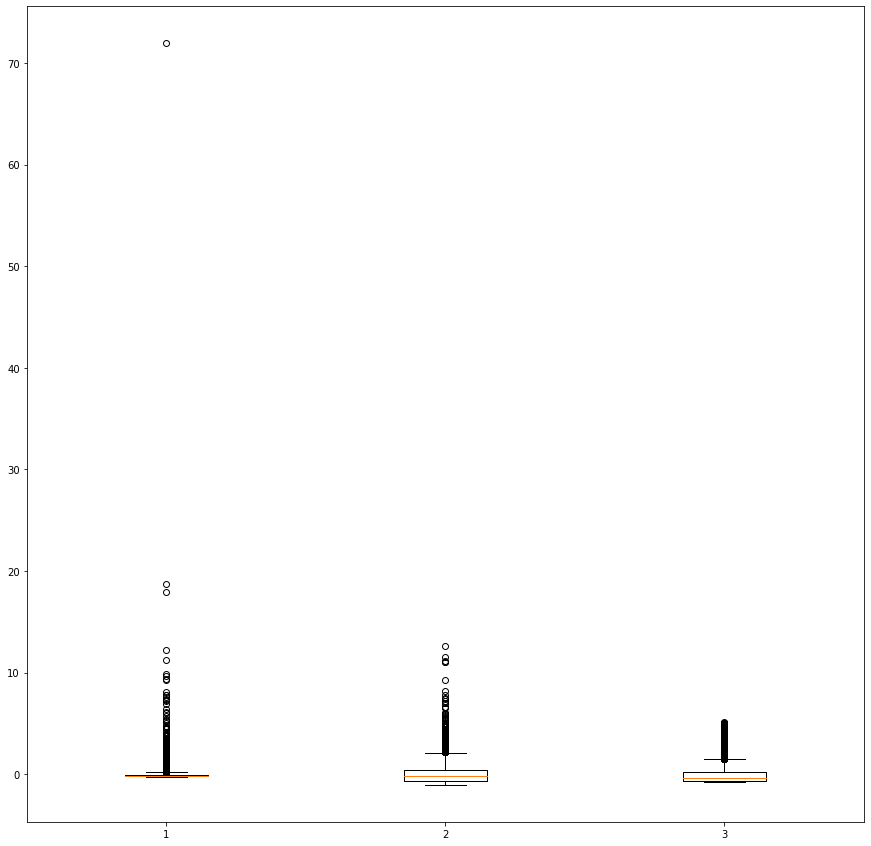

In [51]:
fig=plt.figure(figsize=(15,15))
plt.boxplot(rfm_normalized)
plt.show()

In [52]:
kmeans=KMeans(n_clusters=4, max_iter=100)
kmeans.fit(rfm_normalized)


KMeans(max_iter=100, n_clusters=4)

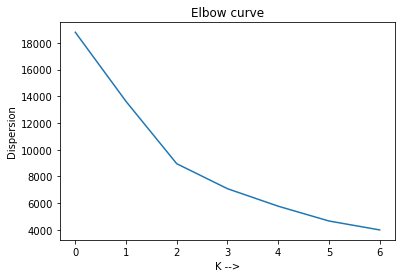

In [53]:
ssd=[]
clusters=[2,3,4,5,6,7,8]
for num_clusters in clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(rfm_normalized)
    ssd.append(kmeans.inertia_)
x=np.arange(7)
plt.plot(x,ssd)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")
plt.show()

In [54]:
for num_clusters in clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=100)
    kmeans.fit(rfm_normalized)
    cluster_labels = kmeans.labels_
    
    #silhoutte score
    silh=silhouette_score(rfm_normalized, cluster_labels)
    print('For n_clusters= {0}, the silhouette score is {1}'.format(num_clusters, silh))
#A score closer to 1 indicates that the data point is very similar to other data points in the cluster

For n_clusters= 2, the silhouette score is 0.47924622983775067
For n_clusters= 3, the silhouette score is 0.4823292801910358
For n_clusters= 4, the silhouette score is 0.4821145150832854
For n_clusters= 5, the silhouette score is 0.4500065991745426
For n_clusters= 6, the silhouette score is 0.42293701228817354
For n_clusters= 7, the silhouette score is 0.40921953980440334
For n_clusters= 8, the silhouette score is 0.39123822483940573


In [55]:
kmeans= KMeans(n_clusters=3, max_iter=100)
kmeans.fit(rfm_normalized)


KMeans(max_iter=100, n_clusters=3)

In [56]:
rfm_normalized.loc[:,'Client_id']=segmented_rfm['client_id']
rfm_normalized['cluster']=kmeans.labels_
rfm_normalized


,0,1,2,Client_id,cluster
0,-0.217621,-0.574897,-0.562881,22899,0
1,-0.226586,-0.938358,1.755187,27914,1
2,0.747141,-0.029706,-0.459855,28753,0
3,-0.191566,-0.120571,1.072645,31385,1
4,0.088269,0.697216,-0.408343,38084,0
...,...,...,...,...,...
8572,-0.127275,-1.029223,0.840838,99967537,1
8573,-0.174247,-1.029223,-0.653028,99984336,0
8574,-0.160826,-1.029223,4.330818,99985917,1
8575,-0.202845,-0.938358,0.287078,99991245,0


<AxesSubplot:xlabel='cluster', ylabel='0'>

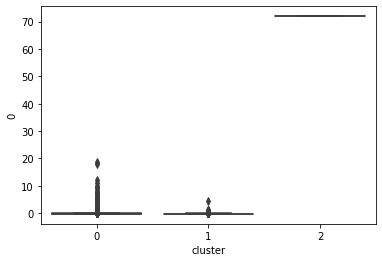

In [57]:
sns.boxplot(x='cluster', y=0, data=rfm_normalized)

<AxesSubplot:xlabel='cluster', ylabel='1'>

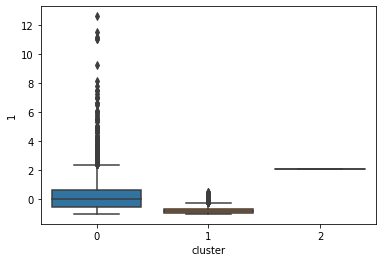

In [58]:
sns.boxplot(x='cluster', y=1, data=rfm_normalized)

<AxesSubplot:xlabel='cluster', ylabel='2'>

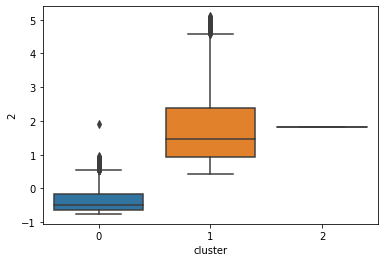

In [59]:
sns.boxplot(x='cluster', y=2, data=rfm_normalized)

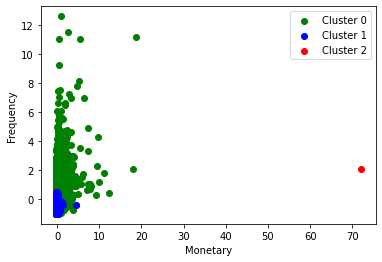

In [60]:
rfm_normalized=rfm_normalized.rename(columns={0:'Monetary', 1:'Frequency', 2:'Recency'})
flabel0=rfm_normalized[rfm_normalized['cluster']==0]
flabel1=rfm_normalized[rfm_normalized['cluster']==1]
flabel2=rfm_normalized[rfm_normalized['cluster']==2]

plt.scatter(flabel0['Monetary'],flabel0['Frequency'],color='green',label='Cluster 0')
plt.scatter(flabel1['Monetary'],flabel1['Frequency'],color='blue',label='Cluster 1')
plt.scatter(flabel2['Monetary'],flabel2['Frequency'],color='red',label='Cluster 2')
plt.legend()
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()


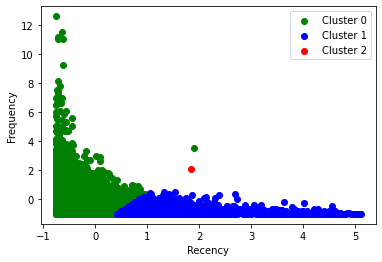

In [61]:
plt.scatter(flabel0['Recency'],flabel0['Frequency'],color='green',label='Cluster 0')
plt.scatter(flabel1['Recency'],flabel1['Frequency'],color='blue',label='Cluster 1')
plt.scatter(flabel2['Recency'],flabel2['Frequency'],color='red',label='Cluster 2')
plt.legend()
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

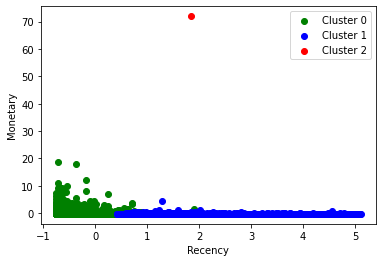

In [62]:
plt.scatter(flabel0['Recency'],flabel0['Monetary'],color='green',label='Cluster 0')
plt.scatter(flabel1['Recency'],flabel1['Monetary'],color='blue',label='Cluster 1')
plt.scatter(flabel2['Recency'],flabel2['Monetary'],color='red',label='Cluster 2')
plt.legend()
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

No handles with labels found to put in legend.


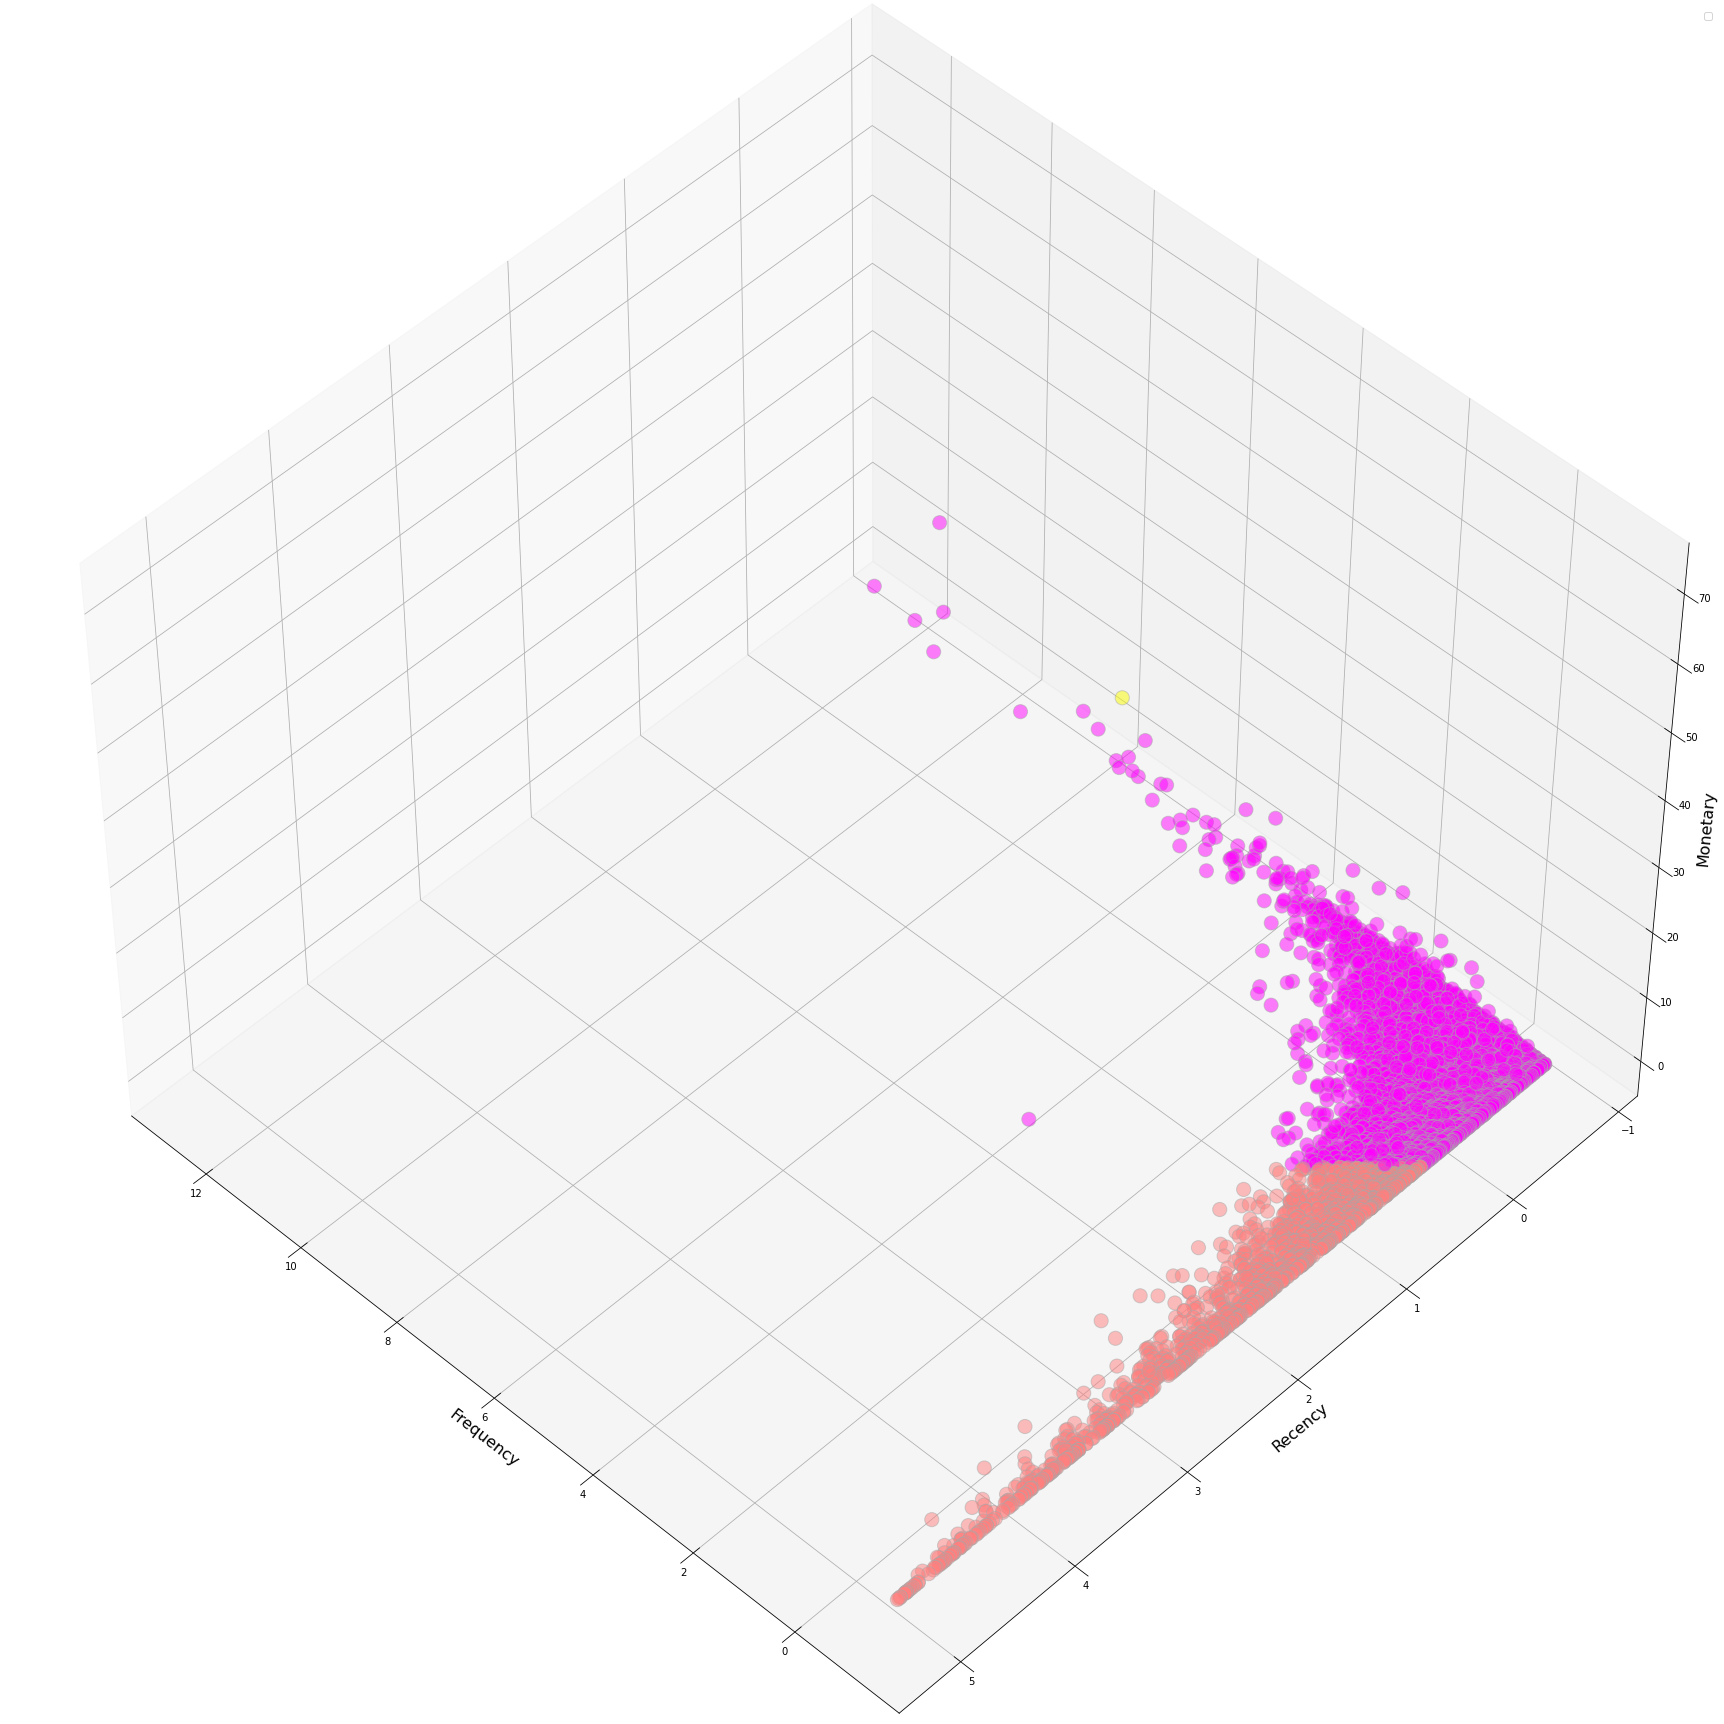

In [63]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
plt.rcParams["figure.figsize"]=(25,25)
plt.rcParams['legend.fontsize'] = 10
fig=plt.figure(1)
plt.clf()
ax=Axes3D(fig,rect = [0,0,.95,1],
         elev=48,
         azim=134)
plt.cla()
ax.scatter(rfm_normalized['Frequency'], rfm_normalized['Recency'],rfm_normalized['Monetary'],
          c=rfm_normalized['cluster'],
          s=200,
          cmap='spring',
          alpha = 0.5,
          edgecolor='darkgrey')
ax.set_xlabel('Frequency', fontsize=16)
ax.set_ylabel('Recency', fontsize=16)
ax.set_zlabel('Monetary', fontsize=16)

ax.legend()
plt.show()

# Hierarchical Clustering

# 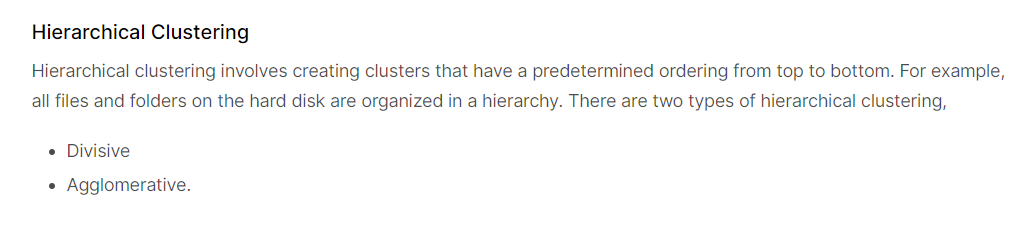

In [64]:
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt


In [65]:
new_rfm=rfm_normalized[['Monetary','Frequency','Recency']]
rfm_normalized

,Monetary,Frequency,Recency,Client_id,cluster
0,-0.217621,-0.574897,-0.562881,22899,0
1,-0.226586,-0.938358,1.755187,27914,1
2,0.747141,-0.029706,-0.459855,28753,0
3,-0.191566,-0.120571,1.072645,31385,1
4,0.088269,0.697216,-0.408343,38084,0
...,...,...,...,...,...
8572,-0.127275,-1.029223,0.840838,99967537,1
8573,-0.174247,-1.029223,-0.653028,99984336,0
8574,-0.160826,-1.029223,4.330818,99985917,1
8575,-0.202845,-0.938358,0.287078,99991245,0


In [66]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

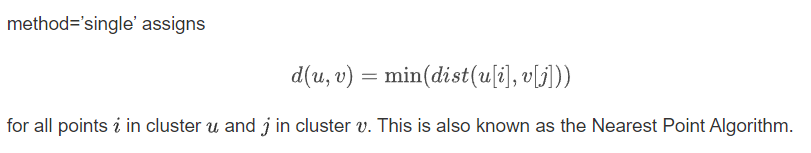

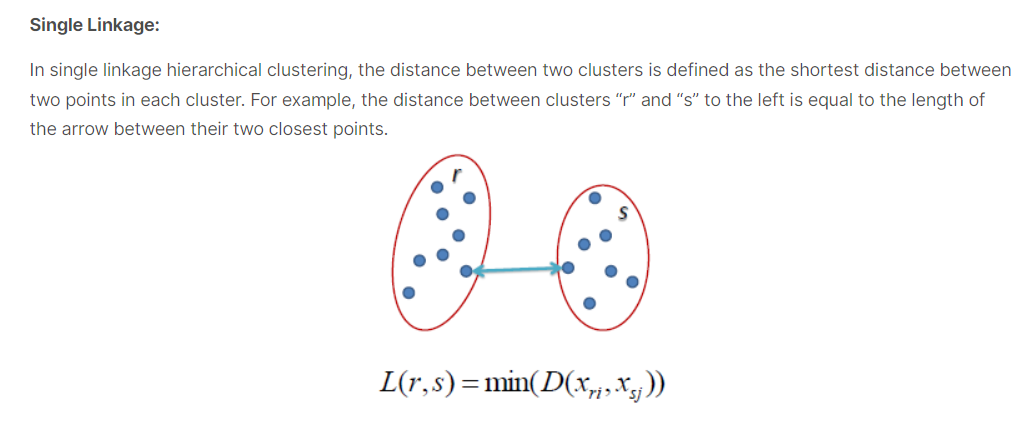

In [67]:


# Single linkage: 
plt.figure(figsize=(7, 10))
mergings = linkage(new_rfm, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

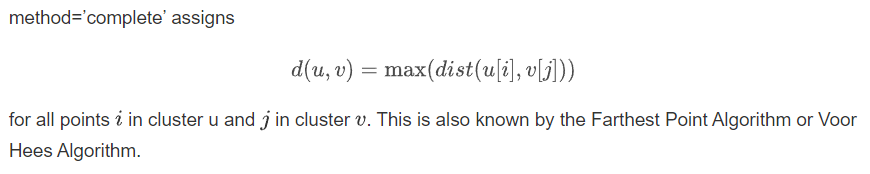

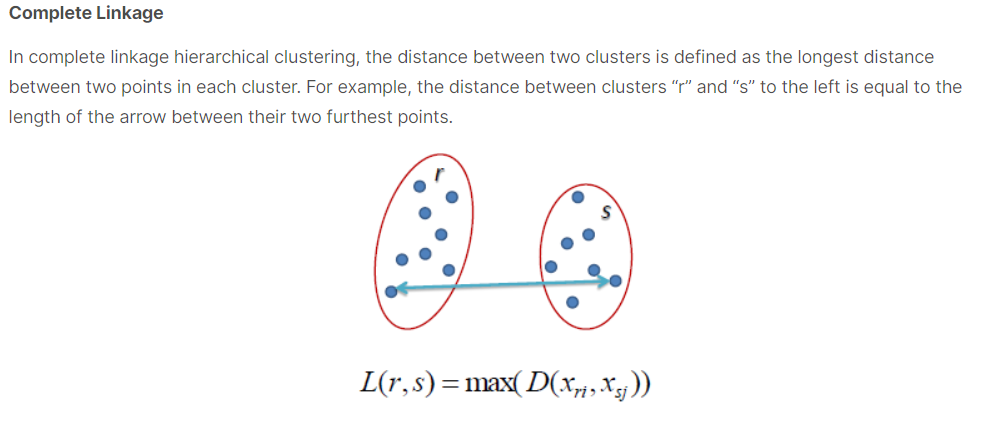

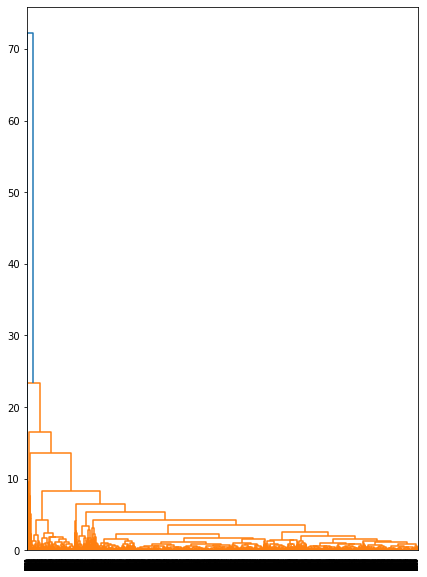

In [ ]:
#Complete linkage
plt.figure(figsize=(7, 10))
mergings = linkage(new_rfm, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

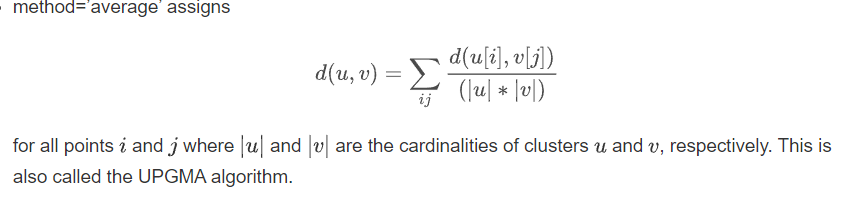

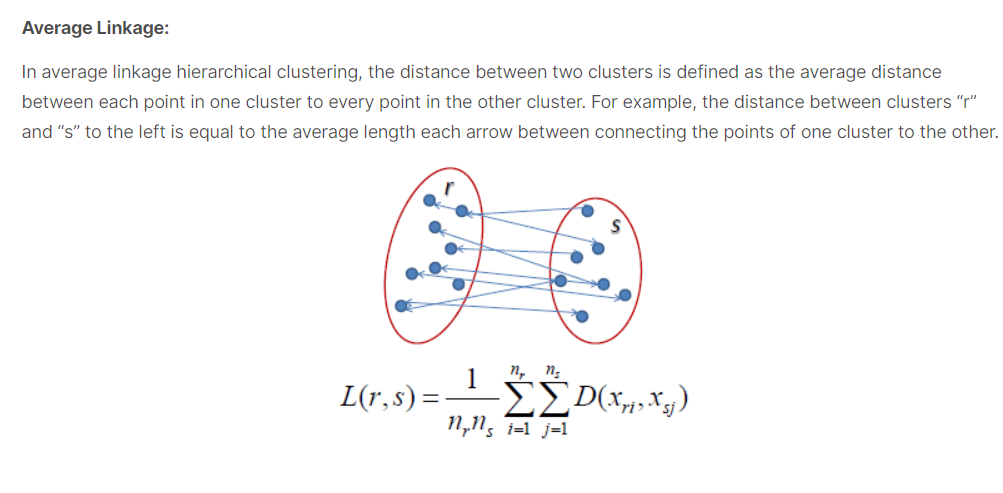

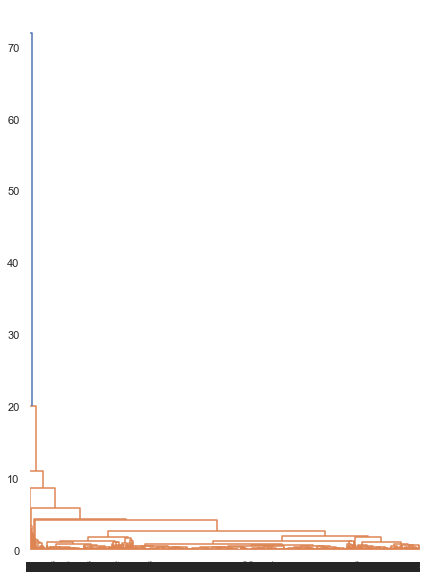

In [ ]:
#average linkage
plt.figure(figsize=(7, 10))
mergings = linkage(new_rfm, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

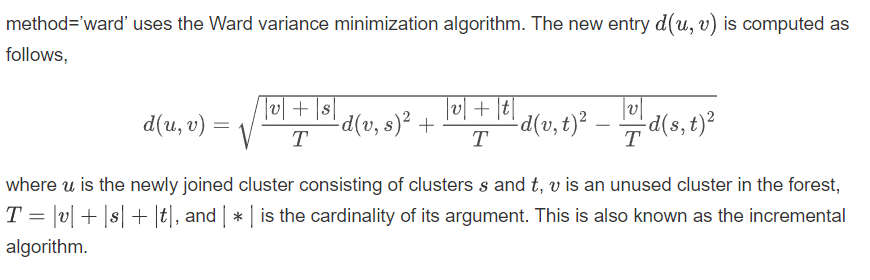

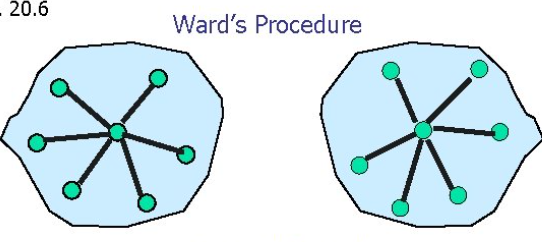

**In the script above we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.**


*We use 'ward' as the method since it minimizes then variants of distances between the clusters.*

**The output of the script above looks like this:**

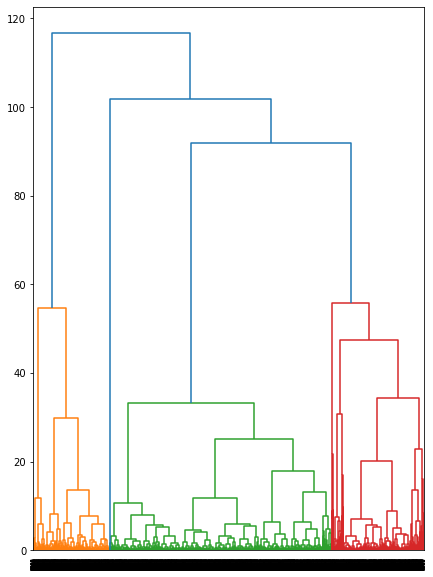

In [ ]:
plt.figure(figsize=(7, 10))
mergings = linkage(new_rfm, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

**By the following code can be seen that we have 4 shapes in dendogram , so we have 4 clusters**

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 2, ..., 1, 0, 0])

**Creating new column Cluster_labels to add cluster classification**

In [ ]:
new_rfm['Cluster_Labels'] = cluster_labels
new_rfm

<ipython-input-183-3b398349fa1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rfm['Cluster_Labels'] = cluster_labels


,Monetary,Frequency,Recency,Cluster_Labels
0,-0.217621,-0.574897,-0.562881,0
1,-0.226586,-0.938358,1.755187,1
2,0.747141,-0.029706,-0.459855,2
3,-0.191566,-0.120571,1.072645,1
4,0.088269,0.697216,-0.408343,2
...,...,...,...,...
8572,-0.127275,-1.029223,0.840838,1
8573,-0.174247,-1.029223,-0.653028,0
8574,-0.160826,-1.029223,4.330818,1
8575,-0.202845,-0.938358,0.287078,0


## Visualization for hierarchical clustering in 3D

No handles with labels found to put in legend.


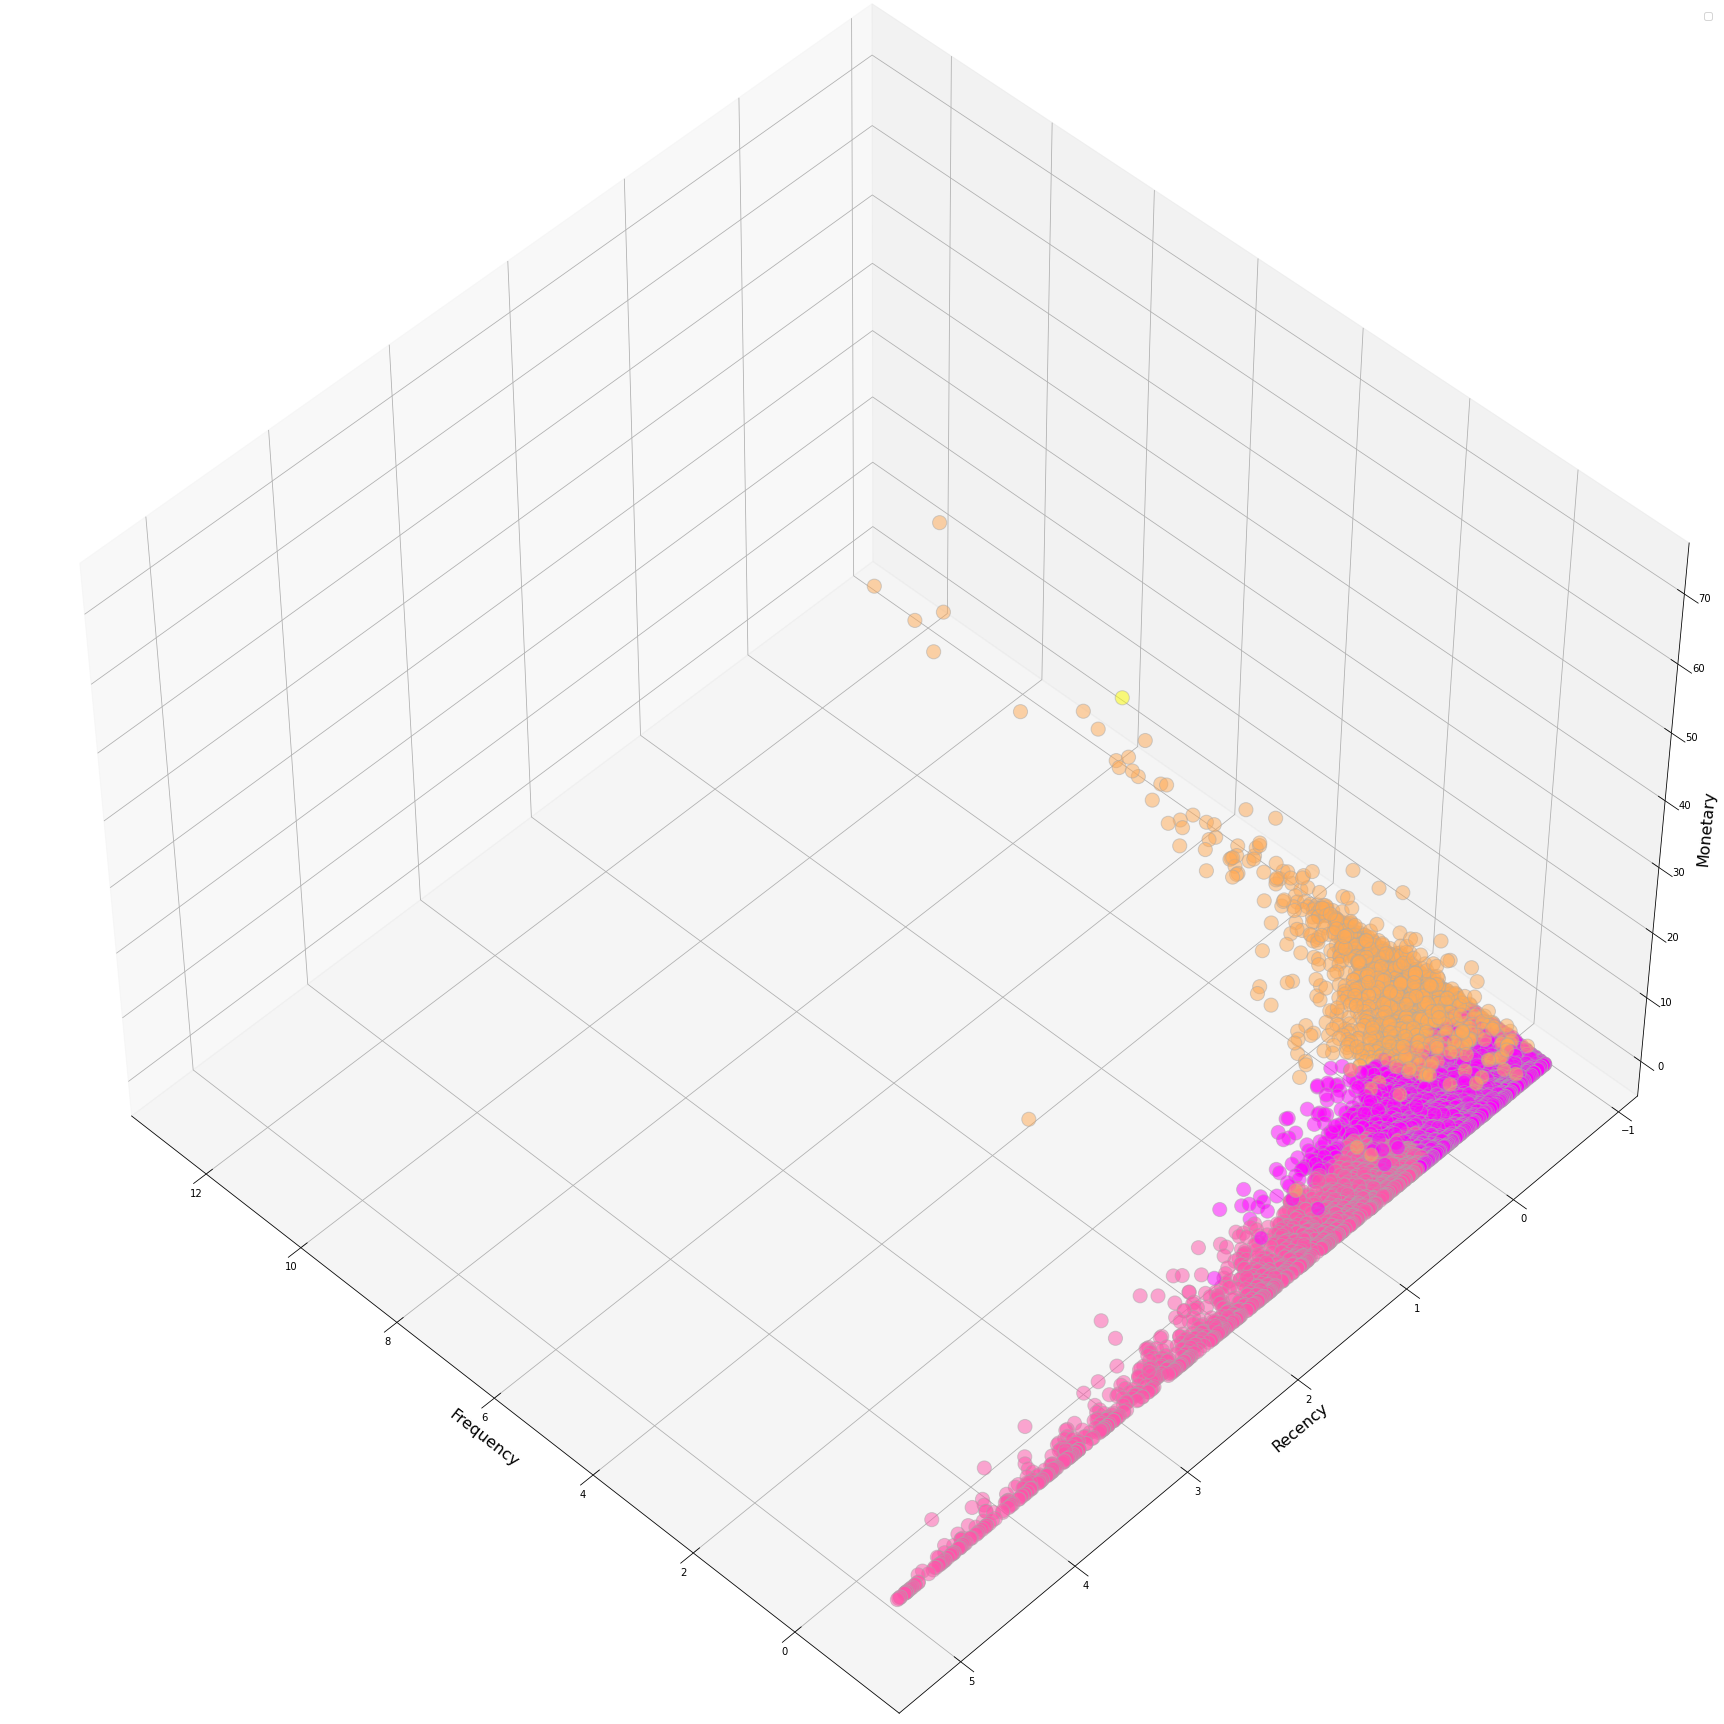

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
plt.rcParams["figure.figsize"]=(25,25)
plt.rcParams['legend.fontsize'] = 10
fig=plt.figure(1)
plt.clf()
ax=Axes3D(fig,rect = [0,0,.95,1],
         elev=48,
         azim=134)
plt.cla()
ax.scatter(new_rfm['Frequency'], new_rfm['Recency'],new_rfm['Monetary'],
          c=new_rfm['Cluster_Labels'],
          s=200,
          cmap='spring',
          alpha = 0.5,
          edgecolor='darkgrey')
ax.set_xlabel('Frequency', fontsize=16)
ax.set_ylabel('Recency', fontsize=16)
ax.set_zlabel('Monetary', fontsize=16)

ax.legend()
plt.show()

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Monetary'>

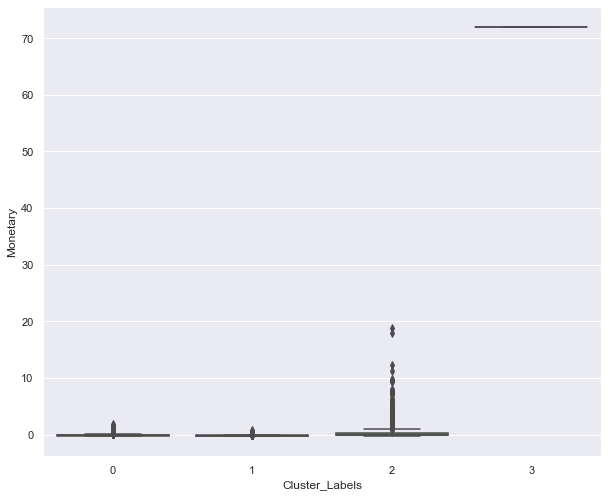

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Monetary', data=new_rfm)


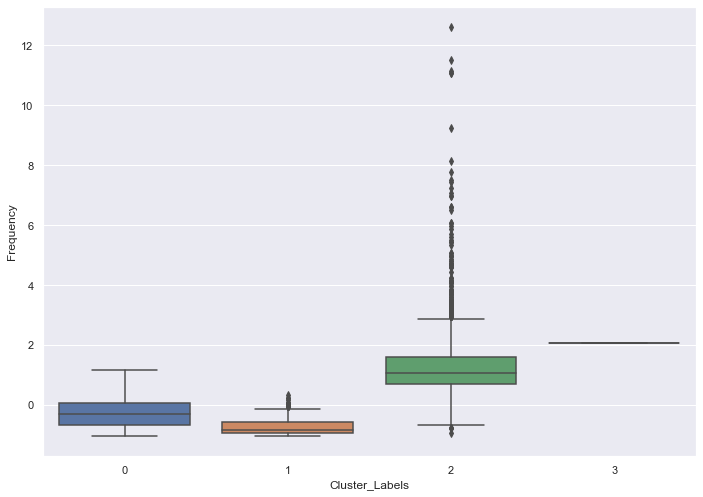

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Frequency', data=new_rfm)
sns.set(rc={'figure.figsize':(10,8.27)})

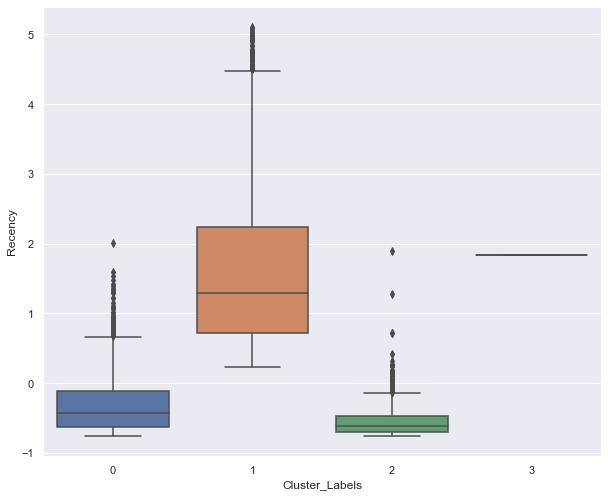

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Recency', data=new_rfm)
sns.set(rc={'figure.figsize':(10,8.27)})

# Let's review other methods of linkage 

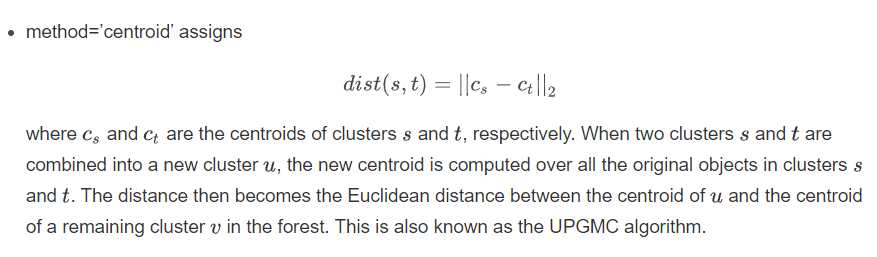

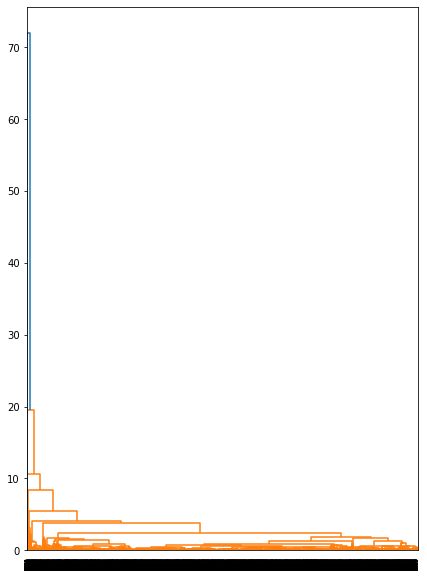

In [ ]:
#centroid linkage
plt.figure(figsize=(7, 10))
mergings_centroid = linkage(new_rfm, method="centroid", metric='euclidean')
dendrogram(mergings_centroid)
plt.show()

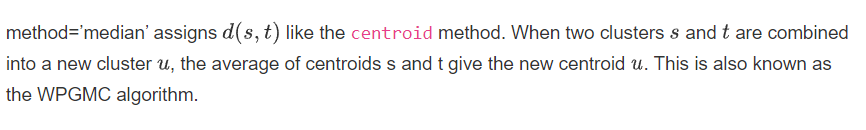

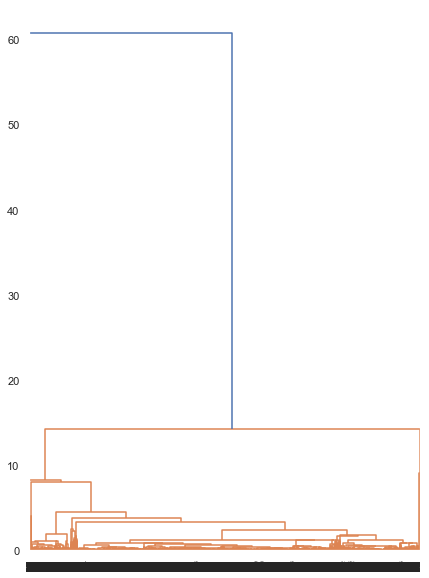

In [ ]:
#median linkage
plt.figure(figsize=(7, 10))
mergings_centroid = linkage(new_rfm, method="median", metric='euclidean')
dendrogram(mergings_centroid)
plt.show()

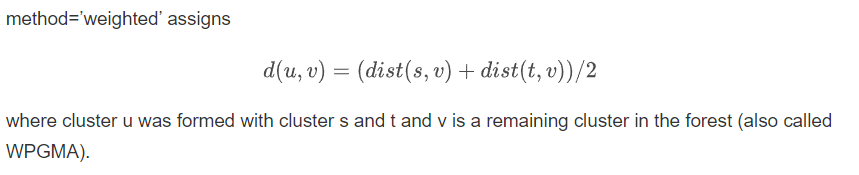

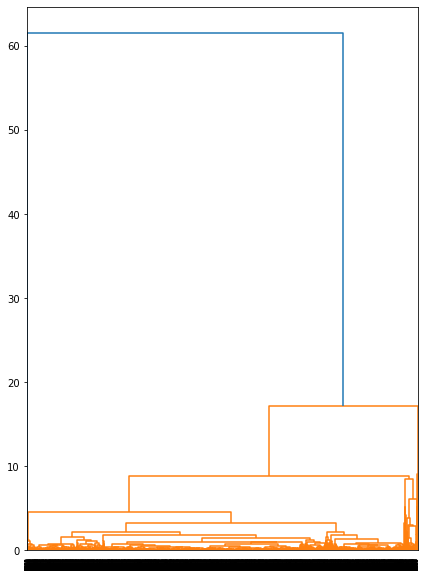

In [ ]:
#weighted linkage
plt.figure(figsize=(7, 10))
mergings_centroid = linkage(new_rfm, method="weighted", metric='euclidean')
dendrogram(mergings_centroid)
plt.show()